In [ ]:
# !unzip "/content/drive/My Drive/Dog_vision/dog-breed-identification.zip" -d "drive/My Drive/Dog_Vision/"

#End-to-End Dog Vision Project

 # 1.Problem 
 when I'm sitting at the cafe and I take a phot of a dog, I want to know what breed of a dog, I want to know what breed of dog it is.

 # 2.Data
 The data we're using is from Kaggle's dog breed identification competition.
 https://www.kaggle.com/c/dog-breed-identification

 # Evaluation
 The evaluation is a file with prediction probablities for each dog breed of each test image

 # Features
 Some info about the data:
 * We're dealing with images(unstructured data) so it's probably best we use deep learning/transfer learning.
 * There are 120 breeds of dogs(this means there are 120 different classes).
 * There are around 10,000 images in the training set(these images have labels).
 * There are around 10,000 images in the test set (these images have no labels, because we'll want to predict them).

# Get our workspace ready

* Import Tensorflow 2.x
* Import Tensorflow Hub
* Make sure we're using a GPU

In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print('TF Hub Version:',tf.__version__)
print('TF version:', tf.__version__)

TF Hub Version: 2.2.0
TF version: 2.2.0


In [ ]:
# Check for GPU availability
print('GPU','available' if tf.config.list_physical_devices('GPU') else 'not availaible')

GPU available


# Getting our data ready (turning into tensors)

with all machine learning models, our data has to be in numerical format. So that's what we'll be doing our first. Turning our image into numbers

Let's start by accessing our data and checking out the labels.



In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv('drive/My Drive/Dog_Vision/labels.csv')
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

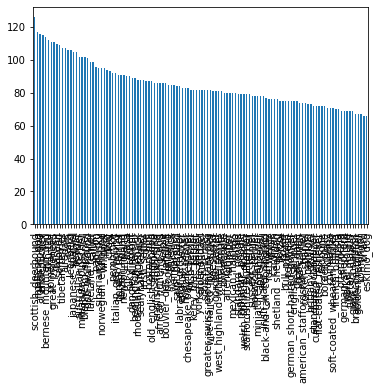

In [ ]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar()

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

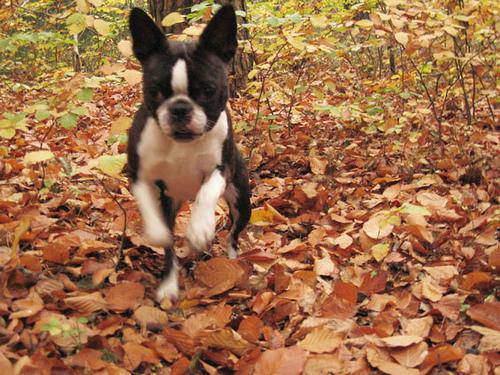

In [ ]:
# Let's view an image
from IPython.display import Image
Image('drive/My Drive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

### Getting images and their labels

Let's get a list of our image file pathname

In [ ]:
# Create pathnames from image ID's
filenames = ['drive/My Drive/Dog_Vision/train/' + fname +'.jpg' for fname in labels_csv['id']]
 
# Check the first 10
filenames[:10]

['drive/My Drive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/My Drive/Dog_Vision/train/')) == len(filenames):
  print('Filenames match actual amoutn of files !!! Proceed.')
else:
  print('Filenames do not match actual amount of files, check the target directory.')

Filenames match actual amoutn of files !!! Proceed.


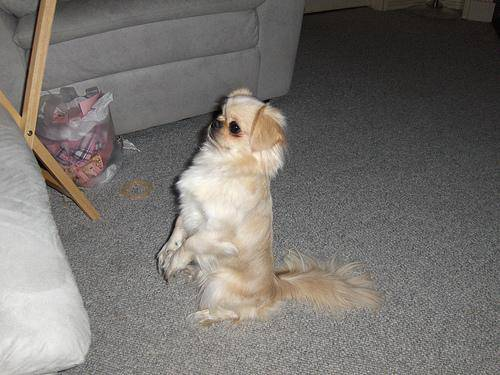

In [ ]:
# One more check
Image(filenames[2])

In [ ]:
labels_csv['breed'][2]

'pekinese'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv['breed']
labels = np.array(labels)
# labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# see if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print('Number of labels matches number of filenames')
else:
  print('poop')

Number of labels matches number of filenames


In [ ]:
# Find the labels matches number of filenames
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every labels into a boolean array
boolean_labels = [label == unique_breeds for label in labels ]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example : Turning boolean array into integers
print(labels[0]) # original labels
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Creating our own validation set
since the dataset form kaggle dosesn't  come with a validation set, we're going to make our own.

In [ ]:
# Setup x and y variables
x = filenames
y = boolean_labels

We're going to  start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 2000 #@param {type:'slider',min:1000 ,max:10000, step:1000} 

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

## Preprocessing Images (turning images into tensors)

To preprocess our images into Tesors we're going to write a fuction which doea a few things:
1. Take an images filepath as input
2. Use Tensorflow to read the file and save it to a variable, images
3. Turn our image (jpg) into Tensors
4. Resize the image to be a shape (224,224)
5. Return the modified image

Befor we do , let's see what importing an image looks like

In [ ]:
# Convert image to Numpy
from matplotlib.pyplot import imread
image = imread(filenames[32])
image.shape

(375, 500, 3)

In [ ]:
image[:2]

array([[[ 0, 18,  5],
        [ 2, 22, 10],
        [72, 92, 80],
        ...,
        [ 1, 12,  4],
        [ 3, 14,  6],
        [ 5, 16,  8]],

       [[45, 65, 53],
        [ 0,  7,  0],
        [ 0, 13,  1],
        ...,
        [ 3, 14,  6],
        [ 4, 15,  7],
        [ 6, 17,  9]]], dtype=uint8)

In [ ]:
# Turn image into Tensors

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 0, 18,  5],
        [ 2, 22, 10],
        [72, 92, 80],
        ...,
        [ 1, 12,  4],
        [ 3, 14,  6],
        [ 5, 16,  8]],

       [[45, 65, 53],
        [ 0,  7,  0],
        [ 0, 13,  1],
        ...,
        [ 3, 14,  6],
        [ 4, 15,  7],
        [ 6, 17,  9]]], dtype=uint8)>

##Now we've seen what an image looks like as a tensor, let's make a function to preprocess them.

Preprocessing Images (turning images into tensors)

To preprocess our images into Tesors we're going to write a fuction which doea a few things:
1. Take an images filepath as input
2. Use Tensorflow to read the file and save it to a variable, images
3. Turn our image (jpg) into Tensors
4. Normalize our image (convert color channel values from 0-225 to 0-1)
5. Resize the image to be a shape (224,224)
6. Return the modified image

In [ ]:
# Define image size 
IMG_SIZE = 224

# Create a fuction for preprocessing images 
def process_image(image_path):
  '''
  Takes an image file path and turn into tensors
  '''
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 color channels (Red, Green,Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0 -255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value(224,224)
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image


In [ ]:
tensor = tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [ ]:
tensor = tf.image.decode_jpeg(tensor, channels=3)
tensor[:2]

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]],

       [[ 65,  74,  71],
        [ 72,  81,  78],
        [ 79,  88,  85],
        ...,
        [114, 127, 107],
        [117, 130, 110],
        [116, 129, 109]]], dtype=uint8)>

In [ ]:
tf.image.convert_image_dtype(tensor, tf.float32)

<tf.Tensor: shape=(500, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]],

       [[0.26666668, 0.3019608 , 0.2901961 ],
        [0.29803923, 0.33333334, 0.32156864],
        [0.3254902 , 0.36078432, 0.34901962],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.47058827, 0.52156866, 0.4431373 ],
        [0.48235297, 0.53333336, 0.454902  ]],

       ...,

       [[0.6784314 , 0.7843138 , 0.60784316],
        [0.64

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,00+ images in one go.... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be)

In order to use TenserFlow effectively, we need our data in the form of Tensor tuple (image, label)


In [ ]:
# Create a simple function to return a tuple(image, label)
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).

  '''
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo for the function
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: (image, label)
let's make a function to turn all of our data (x and y) into batches!

In [ ]:
# Define the batch size, 32 is good
BATCH_SIZE = 32
 
# Create a function to turn data into batches
def create_data_batches(x, y=None,batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Create batches of data out of image (x) and label (y) pairs.
  SHuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as inputs(no labels).
  '''
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print('creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
 
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print('creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
 
    data_batch =  data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
 
  else:
    print('Creating training data batches...')
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is fasther than shuffling
    data = data.shuffle(buffer_size=len(x))
 
    # Create (image, label) tuples {this also turn the image into a preprocessed image}
    data = data.map(get_image_label)
 
    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val, valid_data=True)

Creating training data batches...
creating validation data batches...


In [ ]:
# Check out the diffrent attributes of our data batches
train_data.element_spec, val_data.element_spec 

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visulaizing Data Batches

our data is in batches, however, these can be a little hard to understand/comprehend, lets visualize the data

In [ ]:
# Here, to debatch the data
train_images,  train_labels = next(train_data.as_numpy_iterator())

In [ ]:
len(train_images), len(train_labels)

(32, 32)

In [ ]:
import matplotlib.pyplot as plt

# create a function for viewing images in a data batch
def show_25_images(images, labels):
  '''
  Displays a plot of 25 images and their labels from a data batch.
  '''
  # setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25(for displaying 25 images)
  for i in range(25):
    # create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    # add the image label as the title:
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')

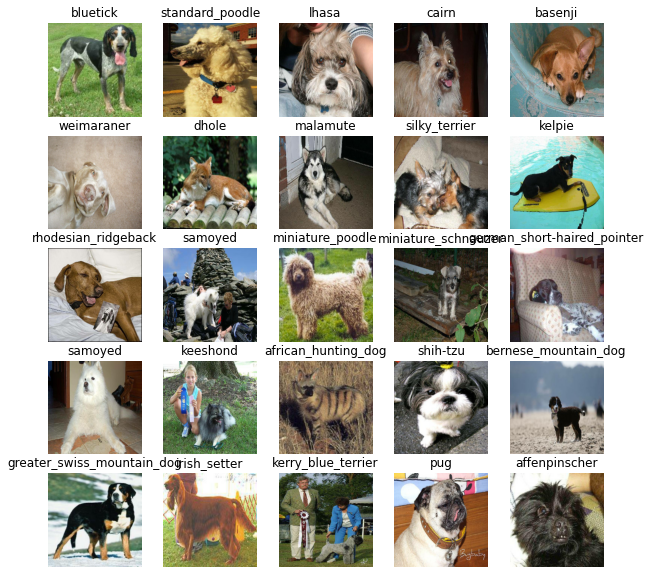

In [ ]:
# Now let's visualize the data in a training batch
train_images,  train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

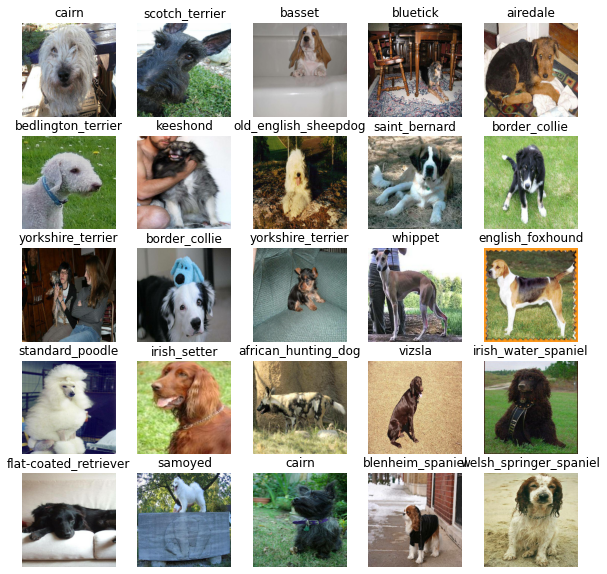

In [ ]:
#Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building your model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape(image labels, in the form of Tensors) of our model.
* The URL of the model we want ot use.

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, hieght, width , color channels

# setup output shape of our model
OUTPUT_SHAPE =len(unique_breeds)

# Setup model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


Now we'be got our inputs, outputs and model ready to go.
Let's put them together into a Keras deeplearning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've
chose as parameters.
* Defines the layers in a Keras model in sequential fashion
(do this first,then this, then that).
* Compiles the model (says it should be evaluated and imporoved)
* Builds the model (says it should be evaluated and imporoved)
* Builds the model(tells the model the input shape it'll be getting)
* Returns the model.



In [ ]:
# Create a function whch builds a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url = MODEL_URL ):
  print('Building model with:', MODEL_URL)  

  # Setup the model layers
  model =  tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layers)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model




In [ ]:
model= create_model()
model.summary()



Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

callbacks are helper function a model can use during training to do such things as save its progress, check its progress or stop trainnig early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps tracks our models progress and snother for early stopping which prevents our model from training for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we nedd to do 3 things:

1. Load the TesorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to directory and pass it to our model's fit() function.
3. Visualize our models training with the %tensorboard magic function(we'll do this after model trianing).

In [ ]:
# Load TensorBoard notebook extention
%load_ext tensorboard

import datetime
# Create a funtion to build a Tensorboard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join('drive/My Drive/Dog_Vision/logs',
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping callback
Early stopping helps stop our model from overfititng by stopping traininig if a cetain evaluation metric stops imporving.

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training a model (on subset of data)

Our first model is noly going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:'slider',min:10, max:100}

In [ ]:
# Check to make sure we're still running on a GPU
print('GPU','available' if tf.config.list_physical_devices('GPU')else 'not available')

GPU available


Let's create a function which trains a model.

* Create a model using create_model()
* Setup a Tensorboard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the trianing data, validation data, number of epoch to train for (NUM_EPOCHS) and the callback we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  '''
  Trains a given model and return the trained version.
  '''
  # Create a model
  model =  create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data = val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 353s 14s/step - loss: 4.5748 - accuracy: 0.1100 - val_loss: 3.5219 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 8s 303ms/step - loss: 1.6186 - accuracy: 0.7113 - val_loss: 2.1998 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 6s 257ms/step - loss: 0.5532 - accuracy: 0.9388 - val_loss: 1.7097 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 6s 256ms/step - loss: 0.2447 - accuracy: 0.9850 - val_loss: 1.5301 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 6s 258ms/step - loss: 0.1439 - accuracy: 0.9987 - val_loss: 1.4648 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 6s 258ms/step - loss: 0.0992 - accuracy: 1.0000 - val_loss: 1.4249 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================

### Checking the TensorBoard logs

The TensorBoard magic function(%tensorboard) will acess the logs directory we crewated earlier and visulalize its content

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog_Vision/logs

Output hidden; open in https://colab.research.google.com to view.

## Making and evaluating predictions using a trained model

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Make predictions on the validation data (not used to trian on)
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 176ms/step


array([[5.6111952e-04, 7.7975274e-05, 3.3556216e-04, ..., 1.2350235e-04,
        9.1129215e-05, 1.4167868e-03],
       [7.7242579e-04, 1.3812518e-04, 1.3617270e-02, ..., 6.8256760e-04,
        1.5743936e-03, 2.5213694e-05],
       [4.2722027e-06, 1.3838598e-05, 8.4629964e-06, ..., 2.1563503e-05,
        1.5956393e-05, 2.0188572e-05],
       ...,
       [2.5684624e-06, 1.2630745e-04, 4.1771149e-05, ..., 1.9235677e-05,
        1.0168115e-04, 1.5950585e-05],
       [1.3573169e-03, 7.8946454e-05, 7.3355732e-05, ..., 9.6039024e-05,
        5.2730044e-05, 5.0629000e-03],
       [4.4634900e-04, 5.1596675e-05, 2.9904416e-04, ..., 2.6310126e-03,
        2.5360845e-03, 6.6689601e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
# First 
index = 34
print(predictions[0])
print(f'Max value(probablity of prediction) : {np.max(predictions[index])}')
print(f'sum: {np.sum(predictions[index])}')
print(f'max index: {np.argmax(predictions[index])}')
print(f'predicted label: {unique_breeds[np.argmax(predictions[index])]}')

[5.61119523e-04 7.79752736e-05 3.35562159e-04 2.26657339e-05
 7.64678261e-05 2.86527738e-05 3.50273587e-02 4.52770764e-04
 2.82299618e-04 3.64729669e-04 6.58286735e-04 8.03626681e-05
 1.01512895e-04 1.38575793e-04 3.91229929e-04 1.06266863e-03
 6.96107099e-06 3.97760779e-01 1.46426983e-05 1.57117338e-05
 2.04377284e-04 1.48882376e-04 3.34679280e-05 7.03498255e-04
 3.58133693e-05 1.68217521e-04 2.70152539e-02 5.48969474e-05
 1.58979616e-04 2.12520550e-04 1.25844919e-04 3.69663205e-04
 7.53482396e-04 2.61682089e-05 8.25323805e-05 3.51842195e-02
 5.92130391e-06 3.08226940e-04 2.70999735e-04 3.47467467e-05
 6.60544669e-04 3.23841377e-05 4.41015181e-05 1.28303989e-04
 1.43408630e-04 1.38090036e-04 5.87353725e-06 2.84377544e-04
 1.80443589e-04 1.06485793e-04 1.44190373e-04 6.19538841e-05
 3.78691795e-04 3.55841112e-05 1.12446745e-04 1.06218986e-05
 3.30815004e-04 2.15127319e-03 2.46031035e-04 1.62428513e-01
 1.22133963e-04 1.09806198e-04 4.63671255e-04 1.38764035e-05
 9.19928425e-04 8.119466

Having the above functionality is great but we want to be able to do it at scale.
And it would be even better if we could see the image the prediction is being made on!

**Note** Prediction probablities are also known as confidence level

In [ ]:
# Turn predictions probablity into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  '''
  Turns an array of predictions probablities into a label.
  '''
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probablities
pred_label= get_pred_label(predictions[81])
pred_label


'cardigan'

Now since our validation data is still in a batch dataset,
we'll have to unbatchify it to make prediction on the 
validation labels(truth labels)

In [ ]:
images_ = []
labels_ = []

# Loop through unbatch data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)


In [ ]:
images_[0] , labels_[0]


In [ ]:
get_pred_label(labels_[43])

'collie'

In [ ]:
get_pred_label(predictions[0])

'border_terrier'

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  '''
  Takes a batched dataset of (image, label) Tensor and return separate arryas 
  of images and lables.
  '''
  images = []
  labels = []
  for image , label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images , labels

 


# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[32], val_labels[32]
 

(array([[[0.49115023, 0.38819155, 0.30437675],
         [0.4783001 , 0.3846464 , 0.29691002],
         [0.46199232, 0.37599844, 0.29364547],
         ...,
         [0.43027928, 0.330952  , 0.20754668],
         [0.40137756, 0.31126592, 0.17400365],
         [0.36202246, 0.29087707, 0.16663706]],
 
        [[0.44663724, 0.3788326 , 0.2916302 ],
         [0.44854268, 0.37946433, 0.2926865 ],
         [0.44967768, 0.38048124, 0.29374278],
         ...,
         [0.3974373 , 0.31180167, 0.1675705 ],
         [0.3804492 , 0.29677877, 0.14223124],
         [0.34888124, 0.28989992, 0.14874955]],
 
        [[0.38039216, 0.35365897, 0.25954133],
         [0.4029865 , 0.36858672, 0.27805802],
         [0.4249814 , 0.3879202 , 0.2983744 ],
         ...,
         [0.3474472 , 0.2781736 , 0.12226877],
         [0.3375145 , 0.27717498, 0.10945936],
         [0.33175847, 0.28769246, 0.13033187]],
 
        ...,
 
        [[0.42664745, 0.5207651 , 0.27762783],
         [0.4844146 , 0.5785323 , 0.33539

In [ ]:
get_pred_label(val_labels[32])

'affenpinscher'

Now we've got ways to get:
* prediction labels
* Validation labels(truth labels)
* Validation images

Let's make some function to make these all a bit more visualize.

we'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.
* Convert the prediction probabilites to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilites, labels, images, n=7):
  '''
  View the prediction , ground truth and image for sample n
  '''
  pred_prob, true_label, image=prediction_probabilites[n], labels[n],images[n]

  # Get the pred label 
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color='green'
  else:
    color = 'red' 

  # Change plot title to be predicted, probablity of prediction and truth label
  plt.title('{} {:2.0f}% {}'.format(pred_label,
                                np.max(pred_prob)*100,
                                true_label),
                                color=color)
  


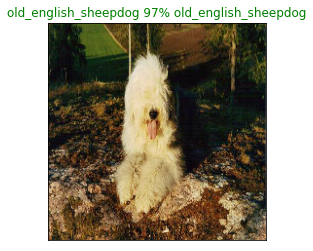

In [ ]:
plot_pred(prediction_probabilites=predictions,
          labels=val_labels,
          images=val_images)


Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 prediction

The function will:
* Take an input of prediction probablities array and a ground truth array and an integer
* Find the prediction using get_pred_labels()
* Find the top 10:
    * Prediction ptobablities indexes
    * Prediction probabiliteis values
    * Prediction labels

* Plot the top 10 prediction probability value and labels, coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities,labels, n=1):
  '''
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  '''
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes 
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
    
  else:
   pass



  



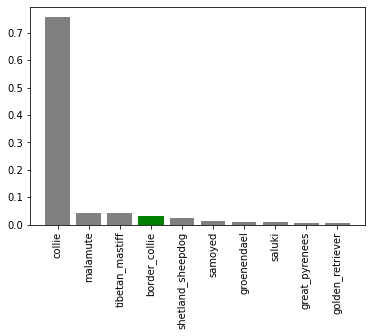

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

In [ ]:
predictions[1]\

array([7.72425788e-04, 1.38125179e-04, 1.36172697e-02, 4.64489590e-03,
       1.99490489e-04, 2.26627708e-05, 5.70211373e-03, 7.31220702e-04,
       1.44583566e-04, 2.74456164e-04, 4.21541743e-04, 1.57788600e-04,
       9.09779337e-05, 1.48650606e-05, 2.34938343e-05, 3.16108235e-05,
       1.99266989e-03, 3.07887567e-05, 3.21616855e-04, 7.82895251e-04,
       1.96632973e-04, 1.20075701e-05, 4.47096681e-05, 4.47750826e-05,
       2.92247103e-04, 2.91103846e-04, 1.39519811e-01, 1.07062014e-03,
       2.35543528e-04, 5.34196559e-04, 7.08213920e-05, 1.19353135e-05,
       1.15703756e-03, 7.26682219e-06, 1.44936988e-04, 1.46287857e-04,
       5.58114043e-05, 1.60722120e-03, 1.17629839e-04, 7.89256446e-05,
       3.23154731e-04, 2.86437949e-04, 4.62914759e-05, 3.06885020e-04,
       5.95777121e-04, 1.09800175e-02, 1.56128430e-04, 3.40841420e-04,
       1.65791977e-02, 1.56485530e-05, 4.24859281e-05, 1.40232252e-04,
       1.38902906e-05, 3.96959986e-05, 1.59942999e-03, 1.13979750e-03,
      

In [ ]:
np.arange(len(get_pred_label(predictions[2])))

array([0, 1, 2, 3, 4, 5])

In [ ]:
get_pred_label(predictions[2])

'basset'

In [ ]:
np.arange(len(unique_breeds[predictions[3].argsort()[-10:][::-1]]))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
unique_breeds[np.argmax(predictions[1])]

'scotch_terrier'

In [ ]:
labels[96]

'wire-haired_fox_terrier'

Now we've got some function to help us visualize our predictions and evaluate our model and let's check out a few.


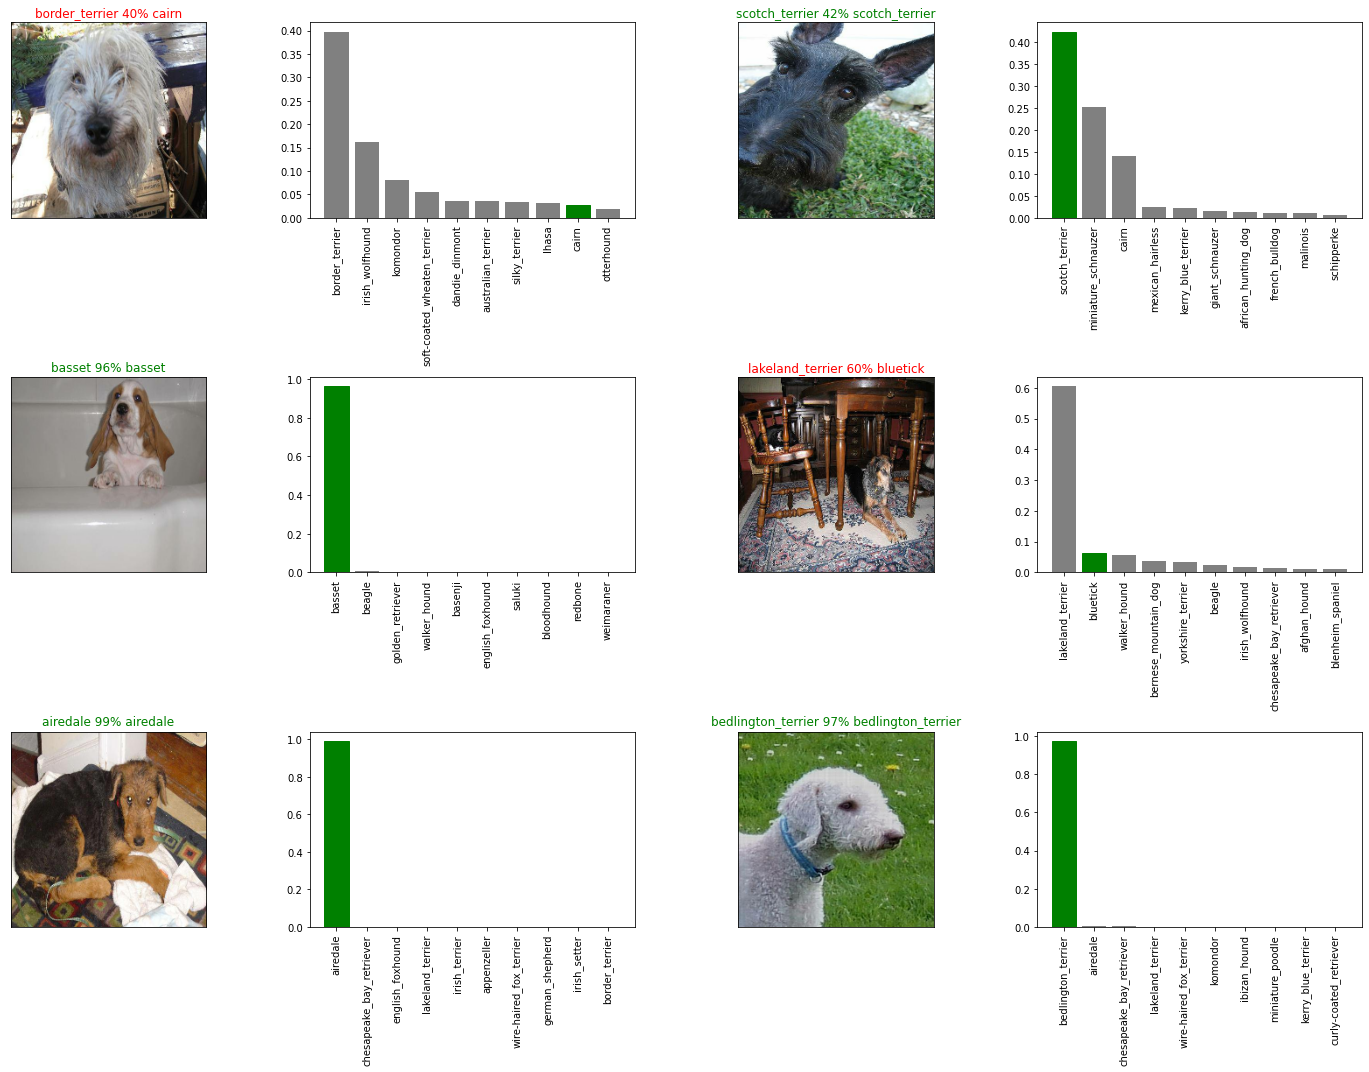

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images =num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilites=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()
  

## Saving and reloading a trained model



In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  '''
  saves a given model in a models directory and appends a suffix(string)
  '''
  # Create a model directory pathname with current time
  modeldir =  os.path.join('drive/My Drive/Dog_Vision/model',
                           datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path=modeldir + '-' + suffix + '.h5' #save format of model
  print(f'saving model to:{model_path}...')
  model.save(model_path)
  return model_path

# Create a function to load a trained model
def load_model(model_path):
  '''
  Loads a saved model from a specified path
  '''
  print(f'loadaing saved model from: {model_path}')
  model= tf.keras.models.load_model(model_path,
                                    custom_objects={'KerasLayer':hub.KerasLayer})
  return model



In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix='1000-images-mobilenetv2-Adam')

saving model to:drive/My Drive/Dog_Vision/model/20200612-07001591945210-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog_Vision/model/20200612-07001591945210-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model('drive/My Drive/Dog_Vision/model/20200611-15401591890013-1000-images-mobilenetv2-Adam.h5')

loadaing saved model from: drive/My Drive/Dog_Vision/model/20200611-15401591890013-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 155ms/step - loss: 1.2954 - accuracy: 0.6750


[1.295351505279541, 0.675000011920929]

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 160ms/step - loss: 1.3103 - accuracy: 0.6500


[1.3102902173995972, 0.6499999761581421]

## Training a big dog model (on the full data)

In [ ]:
len(x), len(y)

(10222, 10222)

In [ ]:
# Create a data batch with the full data set
full_data = create_data_batches(x,y)

Creating training data batches...


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# NO validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)


In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 3665s 11s/step - loss: 1.3355 - accuracy: 0.6747
Epoch 2/100
320/320 [==============================] - 70s 218ms/step - loss: 0.4024 - accuracy: 0.8844
Epoch 3/100
320/320 [==============================] - 68s 213ms/step - loss: 0.2372 - accuracy: 0.9344
Epoch 4/100
320/320 [==============================] - 69s 215ms/step - loss: 0.1540 - accuracy: 0.9620
Epoch 5/100
320/320 [==============================] - 67s 209ms/step - loss: 0.1039 - accuracy: 0.9799
Epoch 6/100
320/320 [==============================] - 71s 222ms/step - loss: 0.0778 - accuracy: 0.9866
Epoch 7/100
320/320 [==============================] - 68s 212ms/step - loss: 0.0581 - accuracy: 0.9916
Epoch 8/100
320/320 [==============================] - 70s 219ms/step - loss: 0.0466 - accuracy: 0.9936
Epoch 9/100
320/320 [==============================] - 66s 207ms/step - loss: 0.0378 - accuracy: 0.9957
Epoch 10/100
320/320 [==============================] - 70s 220m

In [ ]:
save_model(full_model, suffix='full-image-set-mobilenetv2-Adam')

saving model to:drive/My Drive/Dog_Vision/model/20200612-08571591952237-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog_Vision/model/20200612-08571591952237-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/Dog_Vision/model/20200612-08571591952237-full-image-set-mobilenetv2-Adam.h5')

loadaing saved model from: drive/My Drive/Dog_Vision/model/20200612-08571591952237-full-image-set-mobilenetv2-Adam.h5


## Making prediction on the dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created 'create_data_batches' earlier which can take alist of filenames as input and concert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames.
* Convert the filenames into test data batches using create_data_batches() and setting the test data doesn't have labels).
* Make a predictions array by passing the test batches to the predict() method called on our model.

In [ ]:
#Load test image filenames
test_path = "drive/My Drive/Dog_Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog_Vision/test/f169ebcd375a7b6ecd252f27e3dba0a2.jpg',
 'drive/My Drive/Dog_Vision/test/e826c0ae5dd27876781c10e1be444fd5.jpg',
 'drive/My Drive/Dog_Vision/test/f18141846c17b423f3f1df37ef294138.jpg',
 'drive/My Drive/Dog_Vision/test/f3d4b8b4cd50260c89a6d5b29a7e9243.jpg',
 'drive/My Drive/Dog_Vision/test/ea1f200df74cd6c6a458436eedabbc8d.jpg',
 'drive/My Drive/Dog_Vision/test/ea02c2e76cd1c51e5a07280ca363dbc5.jpg',
 'drive/My Drive/Dog_Vision/test/f18e43d6627bf395c2e3aae518067004.jpg',
 'drive/My Drive/Dog_Vision/test/ec28370f936f20133526ee5bdb894c9c.jpg',
 'drive/My Drive/Dog_Vision/test/f596d629c90c70820c38a094f03be387.jpg',
 'drive/My Drive/Dog_Vision/test/ecca3983aa3cf5699ce3aa29c7899df8.jpg']

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames,test_data=True )

createing test data batches...


Note : calling predict() on our full model and passing it the test data batch will take long time to run (about an ~1hr)

In [ ]:
# Make prediction on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 4220s 13s/step
